In [43]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [44]:
#Loading Dataset
df = pd.read_csv('loan_approval_dataset.csv')

In [46]:
#Explority Data Analysis
#Understanding the Data
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [47]:
#Explority Data Analysis
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   loan_id                    4269 non-null   int64
 1    no_of_dependents          4269 non-null   int64
 2    education                 4269 non-null   str  
 3    self_employed             4269 non-null   str  
 4    income_annum              4269 non-null   int64
 5    loan_amount               4269 non-null   int64
 6    loan_term                 4269 non-null   int64
 7    cibil_score               4269 non-null   int64
 8    residential_assets_value  4269 non-null   int64
 9    commercial_assets_value   4269 non-null   int64
 10   luxury_assets_value       4269 non-null   int64
 11   bank_asset_value          4269 non-null   int64
 12   loan_status               4269 non-null   str  
dtypes: int64(10), str(3)
memory usage: 433.7 KB


In [48]:
#Explority Data Analysis 
#Checking the missing Values
df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [49]:
#Explority Data Analysis 
#Checking the Data Type of each Columns
df.dtypes

loan_id                      int64
 no_of_dependents            int64
 education                     str
 self_employed                 str
 income_annum                int64
 loan_amount                 int64
 loan_term                   int64
 cibil_score                 int64
 residential_assets_value    int64
 commercial_assets_value     int64
 luxury_assets_value         int64
 bank_asset_value            int64
 loan_status                   str
dtype: object

In [50]:
#Explority Data Analysis 
#Removing extra spaces from each Columns
df.columns = df.columns.str.strip()

In [ ]:
#Explority Data Analysis 
#Removing unimportant Coloumns from dataset
df = df.drop(columns = "loan_id")

In [52]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


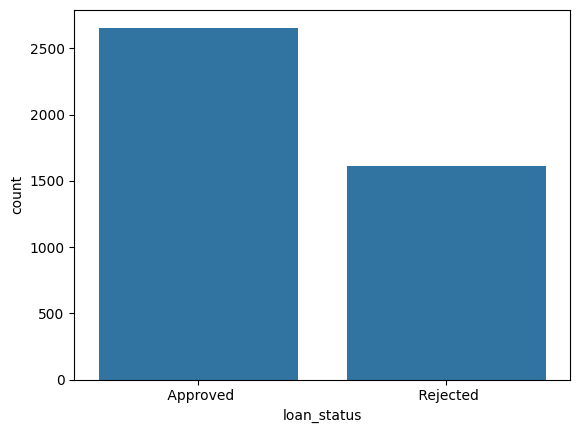

In [53]:
#Explority Data Analysis
#Checking the Output Distribution
sns.countplot(x=df['loan_status'], data=df)
plt.show()

In [54]:
#Target Variable Conversion
df['loan_status'] = df['loan_status'].map({
    ' Approved':1,
    ' Rejected':0
})

In [55]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [56]:
#Encoding catagorical Features
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])
df['self_employed'] = le.fit_transform(df['self_employed'])

In [57]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


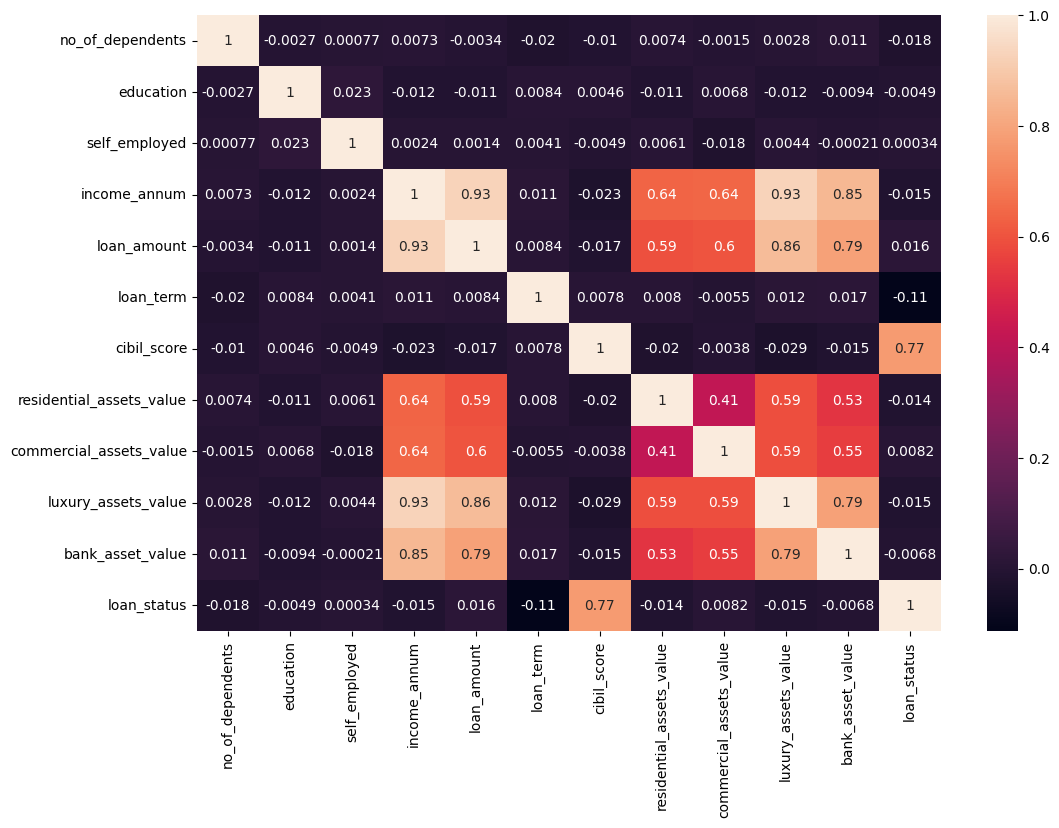

In [58]:
#Corelation between features and target
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [59]:
#Feature Engineering
#Making new feature using ratio of loan_amount and income_annum
df['loan_income_ratio'] = df['loan_amount'] / df['income_annum']

In [60]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,loan_income_ratio
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,3.114583
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,2.975610
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,3.263736
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,3.743902
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,2.469388


In [61]:
#Splitting inputs and outputs
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [62]:
#Splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [63]:
#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
#Handling the imbalance classes using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [65]:
#Training Logistic Regression Model
model_Logistic_Regression = LogisticRegression()
model_Logistic_Regression.fit(x_train_sm, y_train_sm)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [66]:
#Predicting Logistic Regression Model
y_pred = model_Logistic_Regression.predict(X_test)
y_prob = model_Logistic_Regression.predict_proba(X_test)[:,1]

In [67]:
#Accuracy of Logistic regression model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.914519906323185


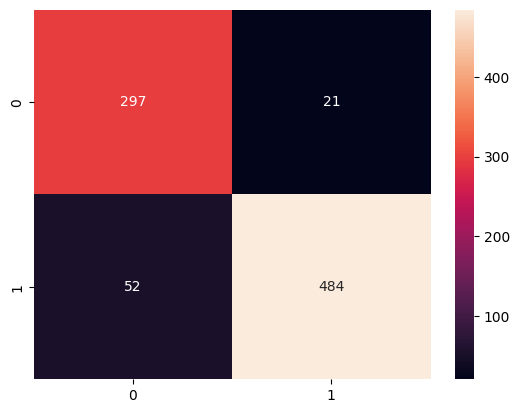

In [68]:
#Heat map of confusion matrix for the logistic regression model 
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

In [ ]:
#Classification results of Logistic regression model 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       318
           1       0.96      0.90      0.93       536

    accuracy                           0.91       854
   macro avg       0.90      0.92      0.91       854
weighted avg       0.92      0.91      0.92       854



In [70]:
# ROC AUC Score of logistic regression model
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

ROC AUC Score: 0.9690814793954755


In [71]:
#Now we are modelling using the Decision Tree
from sklearn.tree import DecisionTreeClassifier
DT  = DecisionTreeClassifier(max_depth=10, random_state=42)
DT.fit(x_train_sm, y_train_sm)
target = DT.predict(X_test)

In [72]:
#Evaluation Decision Tree
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, target))

0.9964871194379391


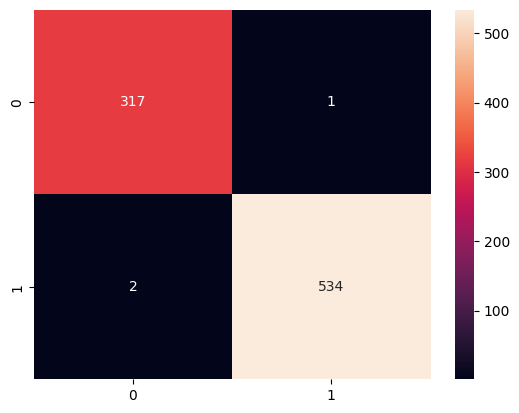

In [73]:
#Heat map of confusion matrix for the Decision Tree
sns.heatmap(confusion_matrix(y_test, target), annot=True, fmt='d')
plt.show()

In [74]:
#Classification results of Decision Tree 
print(classification_report(y_test,target))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       318
           1       1.00      1.00      1.00       536

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854



In [75]:
# ROC AUC Score of Decision Tree
print("ROC AUC Score:", roc_auc_score(y_test, target))

ROC AUC Score: 0.9965620013141838


Summary 
In this notebook, we built a loan approval prediction model and handled the imbalanced dataset using the SMOTE technique. We compared two classification models: Logistic Regression and Decision Tree, and found that the Decision Tree model outperformed Logistic Regression in terms of precision, recall, and F1-score.

This project highlights the importance of handling class imbalance and using appropriate evaluation metrics instead of relying only on accuracy.